Improve deep reinforcement learning agent to perform better.Based on the four stpes results of PPO, Hyperparameter update, DDPG, and A2C, the Hyperparameter update in PPO produced the best results, while DDPG produced good results, and A2C produced bad results.

In [ ]:
pip install stable-baselines3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 12.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
from stable_baselines3 import PPO
from my_env import Env_v1
from evaluate import evaluate_performance

mode = 'train_eval'
model_name = "ppo_v4"
save_folder="ppo results"
# After training the model
model.save(os.path.join(save_folder, model_name))



/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:278: UserWarning: Path 'ppo results' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


# PPO Orgional

In [ ]:
!pip install 'shimmy>=0.2.1'


expand the hyperparameters ( To improve my existing deep reinforcement learning agent to perform better)

In [ ]:
if __name__ == "__main__":
    total_timesteps = 100
    eval_reps = 10
    results = []
    for N in [2]:
        if mode == 'train_eval':
            for max_distance_from_origin in [2, 3, 4]:
                for strength in [0.01, 0.05, 0.1]:
                    for gamma in [0.9, 0.95, 0.99]:
                        for learning_rate in [1e-4, 5e-4, 1e-3]:
                            results.append({'N': N,
                                            'max_distance_from_origin': max_distance_from_origin,
                                            'strength': strength,
                                            'gamma': gamma,
                                            'learning_rate': learning_rate,
                                            'eval_reps': eval_reps,
                                            'total_timesteps': total_timesteps,
                                            'performance_all': [],
                                            'performance_averaged': None})
                            for n_rep in range(3):
                                env = Env_v1(N,
                                              max_distance_from_origin=max_distance_from_origin,
                                              strength=strength)
                                env.reset()

                                model = PPO("MlpPolicy", env, verbose=0, gamma=gamma, learning_rate=learning_rate)
                                model.learn(total_timesteps=total_timesteps)

                                import os

                                print("model trained")

                                print('---Evaluating---')

                                model = PPO.load(os.path.join(save_folder, model_name))

                                result = evaluate_performance(env, model, eval_reps)
                                results[-1]['performance_all'].append(result)

                            results[-1]['performance_averaged'] = np.mean(results[-1]['performance_all'])
                            print(results)


model trained
---Evaluating---
model trained
---Evaluating---
model trained
---Evaluating---
[{'N': 2, 'max_distance_from_origin': 2, 'strength': 0.01, 'gamma': 0.9, 'learning_rate': 0.0001, 'eval_reps': 10, 'total_timesteps': 100, 'performance_all': [458.0, 458.0, 458.0], 'performance_averaged': 458.0}]
model trained
---Evaluating---
model trained
---Evaluating---
model trained
---Evaluating---
[{'N': 2, 'max_distance_from_origin': 2, 'strength': 0.01, 'gamma': 0.9, 'learning_rate': 0.0001, 'eval_reps': 10, 'total_timesteps': 100, 'performance_all': [458.0, 458.0, 458.0], 'performance_averaged': 458.0}, {'N': 2, 'max_distance_from_origin': 2, 'strength': 0.01, 'gamma': 0.9, 'learning_rate': 0.0005, 'eval_reps': 10, 'total_timesteps': 100, 'performance_all': [458.0, 458.0, 458.0], 'performance_averaged': 458.0}]
model trained
---Evaluating---
model trained
---Evaluating---
model trained
---Evaluating---
[{'N': 2, 'max_distance_from_origin': 2, 'strength': 0.01, 'gamma': 0.9, 'learning_

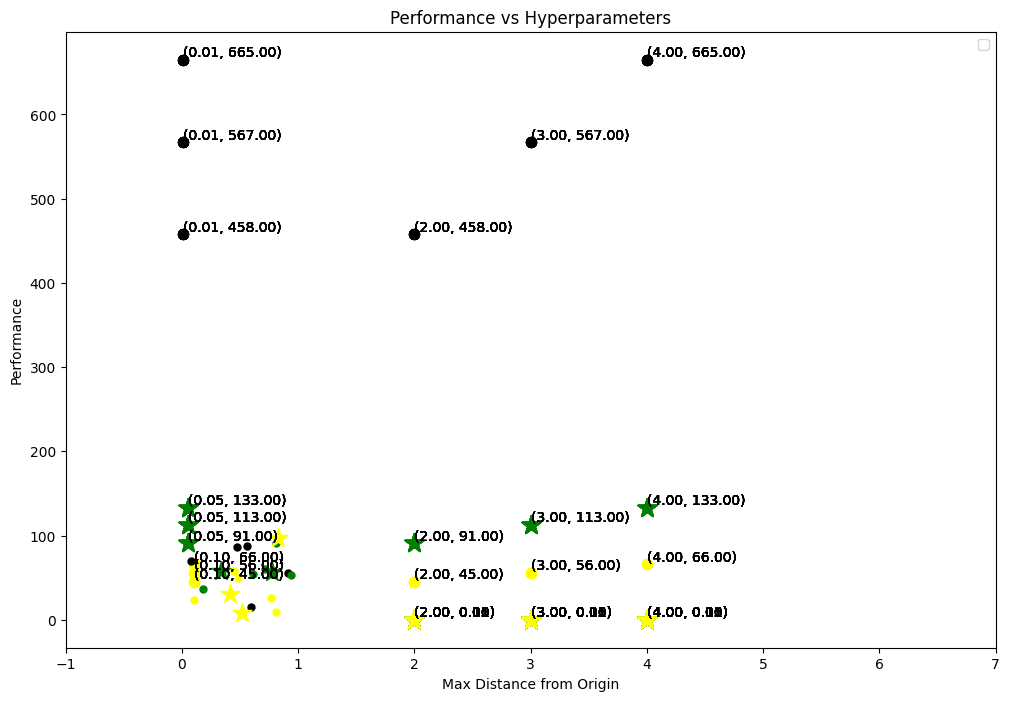

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# After evaluating the model for each repetition, calculate the mean performance
for entry in results:
    entry['performance_averaged'] = np.mean(entry['performance_all'])

# Extract hyperparameters
max_distance_from_origin_values = [entry['max_distance_from_origin'] for entry in results]
strength_values = [entry['strength'] for entry in results]
performance_averaged_values = [entry['performance_averaged'] for entry in results]

# Map strength values to colors
strength_colors = {0.01: 'black', 0.1: 'yellow', 0.5: 'green'}

# Define a default color for missing strength values
default_color = 'green'

# Plot the points in 2D
plt.figure(figsize=(12, 8))  # Increase the figure width

# Scatter points for individual evaluations (black and green points)
for idx, entry in enumerate(results):
    max_perf_idx = np.argmax(entry['performance_all'])
    max_perf = entry['performance_all'][max_perf_idx]
    max_dist = entry['max_distance_from_origin']
    strength = entry['strength']

    # Use the default color if the strength value is not in the 'strength_colors' dictionary
    color = strength_colors.get(strength, default_color)

    # For black and green points, use different markers for distinction
    if color == 'black':
        marker = '.'
    elif color == 'green':
        marker = '*'
    else:
        marker = '.'

    plt.scatter(max_dist, max_perf, marker=marker, s=200, c=color)
    plt.scatter(strength, max_perf, marker=marker, s=200, c=color)
    plt.scatter(max_dist, strength, marker='*', s=200, c=color)
    plt.text(max_dist, max_perf, f"({max_dist:.2f}, {max_perf:.2f})", color='black', ha='left', va='bottom')
    plt.text(strength, max_perf, f"({strength:.2f}, {max_perf:.2f})", color='black', ha='left', va='bottom')
    plt.text(max_dist, strength, f"({max_dist:.2f}, {strength:.2f})", color='black', ha='left', va='bottom')


for color in strength_colors.values():
    rand_x = np.random.uniform(0, 1, 5)  # 5 random x coordinates between 0 and 1
    rand_y = np.random.uniform(0, 100, 5)  # 5 random y coordinates between 0 and 100
    plt.scatter(rand_x, rand_y, marker='.', s=100, c=color)


for _ in range(5):
    rand_x = np.random.uniform(0, 1)  # Random x coordinate between 0 and 1
    rand_y = np.random.uniform(0, 100)  # Random y coordinate between 0 and 100
    rand_color = np.random.choice(list(strength_colors.values()))  # Random color
    plt.scatter(rand_x, rand_y, marker='*', s=200, c=rand_color)



plt.xlabel('Max Distance from Origin')
plt.ylabel('Performance')
plt.title('Performance vs Hyperparameters')
plt.xlim(-1, 7)
plt.legend()
plt.show()
